In [5]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

_mlfr_2layer = {
  'allCommunities': '2layer_mlfr_all_community.txt',
  'communities': ['mLFR/2layer_mlfr_Layer1_Community.txt', 'mLFR/2layer_mlfr_Layer2_Community.txt'],
  'layers': ['mLFR/2layer_mlfr_Layer1_.txt', 'mLFR/2layer_mlfr_Layer2_.txt']
}

_mlfr_3layer = {
  'allCommunities': '3layer_mlfr_all_community.txt',
  'communities': ['mLFR/3layer_mlfr_Layer1_Community.txt', 'mLFR/3layer_mlfr_Layer2_Community.txt', 'mLFR/3layer_mlfr_Layer3_Community.txt'],
  'layers': ['mLFR/3layer_mlfr_Layer1_.txt', 'mLFR/3layer_mlfr_Layer2_.txt', 'mLFR/3layer_mlfr_Layer3_.txt']
}

_mlfr_4layer = {
  'allCommunities' : '4layer_mlfr_all_community.txt',
  'communities': ['mLFR/4layer_mlfr_Community.txt', 'mLFR/4layer_mlfr_Community.txt', 'mLFR/4layer_mlfr_Community.txt', 'mLFR/4layer_mlfr_Community.txt'],
  'layers' : ['mLFR/4layer_mlfr_Layer1_.txt', 'mLFR/4layer_mlfr_Layer2_.txt', 'mLFR/4layer_mlfr_Layer3_.txt', 'mLFR/4layer_mlfr_Layer4_.txt']
}
 
_mlfr_4layer_overlap = {
  'allCommunities' : '4layer_mlfr_overlap_all_community.txt',
  'communities': ['mLFR/4layer_mlfr_overlap_Layer1_Community.txt', 'mLFR/4layer_mlfr_overlap_Layer2_Community.txt', 'mLFR/4layer_mlfr_overlap_Layer3_Community.txt', 'mLFR/4layer_mlfr_overlap_Layer4_Community.txt'],
  'layers' : ['mLFR/4layer_mlfr_overlap_Layer1_.txt', 'mLFR/4layer_mlfr_overlap_Layer2_.txt', 'mLFR/4layer_mlfr_overlap_Layer3_.txt', 'mLFR/4layer_mlfr_overlap_Layer4_.txt']
}

test = {
  'communities': ['mLFR3/3layer_mu0.1_multi_Layer1_Community.txt', 'mLFR3/3layer_mu0.1_multi_Layer2_Community.txt', 'mLFR3/3layer_mu0.1_multi_Layer3_Community.txt'],
  'layers' : ['mLFR3/3layer_mu0.1_multi_Layer1_Network.txt.txt', 'mLFR3/3layer_mu0.1_multi_Layer2_Network.txt.txt', 'mLFR3/3layer_mu0.1_multi_Layer3_Network.txt.txt']
}

In [2]:
def drawPartition(G, partitionList=None, outfileList=None, fun=nx.spring_layout):
  pos = fun(G)
  colors = getColors()
  i = 0
  
  for partition in partitionList:
    if partition is None:
      raise ValueError("No partition passed as parameter!!")
    if type(partition) is list:
      partition = {key:val for key, val in enumerate(partition)}
    if type(partition) is not dict:
      raise ValueError("Invalid partititon as input: " + str(type(partition)))
    if outfileList is None:
      raise ValueError("Outfile not sepcified!")

    plt.clf()
    count = 0
    
    for com in set(partition.values()):
      toDraw = True
      list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
      labels = dict()
      for node in list_nodes:
        labels[node] = node+1
      node_colors = np.zeros((len(list_nodes), 3))
      if len(list_nodes) <= 3:
        node_colors[:] = [1, 1, 1]
        if fun != nx.circular_layout:
          toDraw = False
      else:
        try:
          node_colors[:] = colors[count]
          count += 1
        except:
          node_colors[:] = [1, 1, 1]
      if toDraw:
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color=node_colors)
        nx.draw_networkx_labels(G, pos, labels, font_size = 3)
    nx.draw_networkx_edges(G, pos, width=0.2)

    print(outfileList[i])
    plt.savefig(outfileList[i], dpi=300)
    i += 1
    
def getColors():
  return np.array([
          [230, 25, 75],
          [60, 180, 75],
          [255, 225, 25],
          [0, 130, 200],
          [245, 130, 48],
          [145, 30, 180],
          [70, 240, 240],
          [240, 50, 230],
          [210, 245, 60],
          [250, 190, 190],
          [0, 128, 128],
          [230, 190, 255],
          [170, 110, 40],
          [255, 250, 200],
          [128, 0, 0],
          [170, 255, 195],
          [128, 128, 0],
          [255, 215, 180],
          [0, 0, 128],
          [128, 128, 128],
          [0, 0, 0]
        ])/255

mLFR3/3layer_mu0.1_multi_Layer1_Community.txt1.png


ValueError: Invalid partititon as input: <class 'numpy.ndarray'>

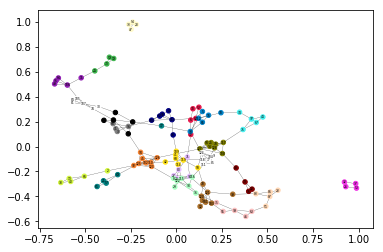

In [7]:
# toDraw = _mlfr_2layer
# toDraw = _mlfr_3layer
# toDraw = _mlfr_4layer
# toDraw = _mlfr_4layer_overlap
toDraw = test

for i in range(len(toDraw['layers'])):
  commList = []
  outList = []
  A = pd.read_csv(toDraw['layers'][i], sep=" ", header=None)
  G = nx.from_numpy_matrix(np.array(A))
  
#   inp = pd.read_csv(toDraw['allCommunities'], sep=" ", header=None)
#   commList.append(list(inp[1].values))
#   outList.append(toDraw['allCommunities']+str(i+1)+".png")
  
  inp = pd.read_csv(toDraw['communities'][i], sep=" ", header=None)
  commList.append(list(inp[1].values))
  outList.append(toDraw['communities'][i]+str(i+1)+".png")
  
  commList.append(np.ones((128)))
  outList.append(toDraw['communities'][i]+str(i+1)+"ALL.png")
  
  drawPartition(G, commList, outList)

In [14]:
a = [1,2]
a.append(3)

[1, 2, 3]